**PCA LDA Test**

PCA performs better in case where number of samples per class is less. Whereas LDA works better with large dataset having multiple classes; class separability is an important factor while reducing dimensionality.



*   PCA is Unsupervised and do not need labels
*   LDA is Supervised and need labels

What to choose for Dimensionality Reduction?
In case of uniformly distributed data, LDA almost always performs better than PCA. However if the data is highly skewed (irregularly distributed) then it is advised to use PCA since LDA can be biased towards the majority class.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data",
                 header=None)
df.columns = ["Class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium",
              "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins",
              "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]
df.shape

(178, 14)

In [2]:
df.head(5)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Class                           178 non-null int64
Alcohol                         178 non-null float64
Malic acid                      178 non-null float64
Ash                             178 non-null float64
Alcalinity of ash               178 non-null float64
Magnesium                       178 non-null int64
Total phenols                   178 non-null float64
Flavanoids                      178 non-null float64
Nonflavanoid phenols            178 non-null float64
Proanthocyanins                 178 non-null float64
Color intensity                 178 non-null float64
Hue                             178 non-null float64
OD280/OD315 of diluted wines    178 non-null float64
Proline                         178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [4]:
df["Class"].value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

In [0]:
def plot_classes(x, y, classes):
  unique = np.unique(classes)

  plt.figure(figsize=(20,10))

  for i, u in enumerate(unique):
      xi = [x[j] for j  in range(len(x)) if classes[j] == u]
      yi = [y[j] for j  in range(len(x)) if classes[j] == u]
      plt.scatter(xi, yi, label=str(u), s=200)
  plt.legend()

  plt.show()

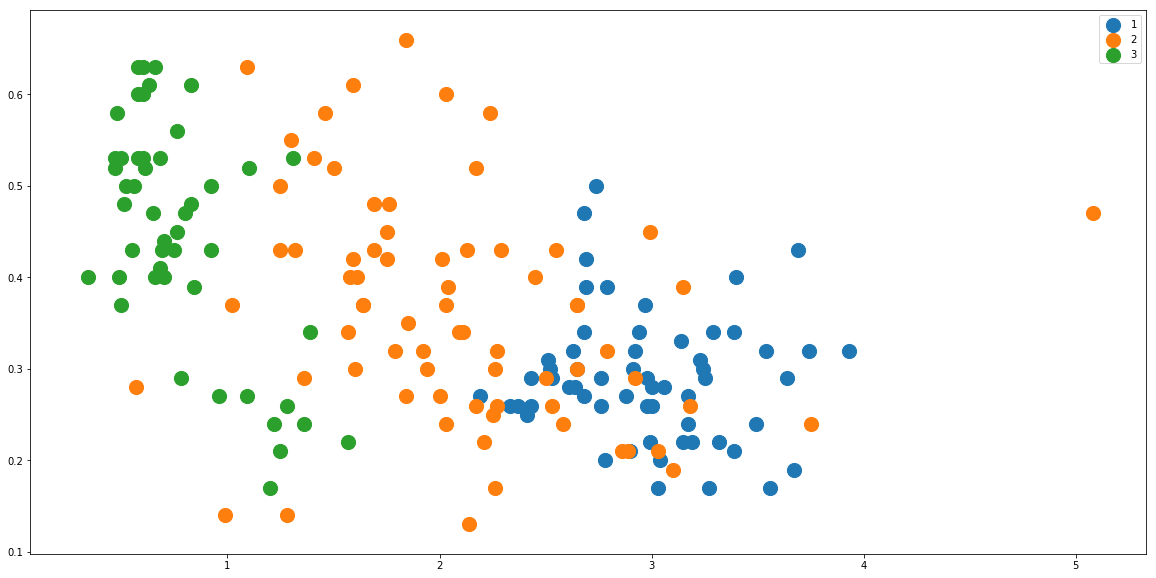

In [6]:
plot_classes(df["Flavanoids"], df["Nonflavanoid phenols"], df["Class"])

**Normalize X**

In [7]:
from sklearn.preprocessing import StandardScaler

y = df.iloc[:, 0:1].values

x = df.iloc[:, 1:]
scaler = StandardScaler()
x = scaler.fit_transform(x)  # PCA is Unsupervised and do not need labels

x = (x - x.min(0)) / x.ptp(0)

x[0]

array([0.84210526, 0.1916996 , 0.57219251, 0.25773196, 0.61956522,
       0.62758621, 0.57383966, 0.28301887, 0.59305994, 0.37201365,
       0.45528455, 0.97069597, 0.56134094])

**PCA**

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_feature_reduced = pca.fit(x).transform(x)

print(x.shape)
print(x_feature_reduced.shape)
print(y.shape)

(178, 13)
(178, 2)
(178, 1)


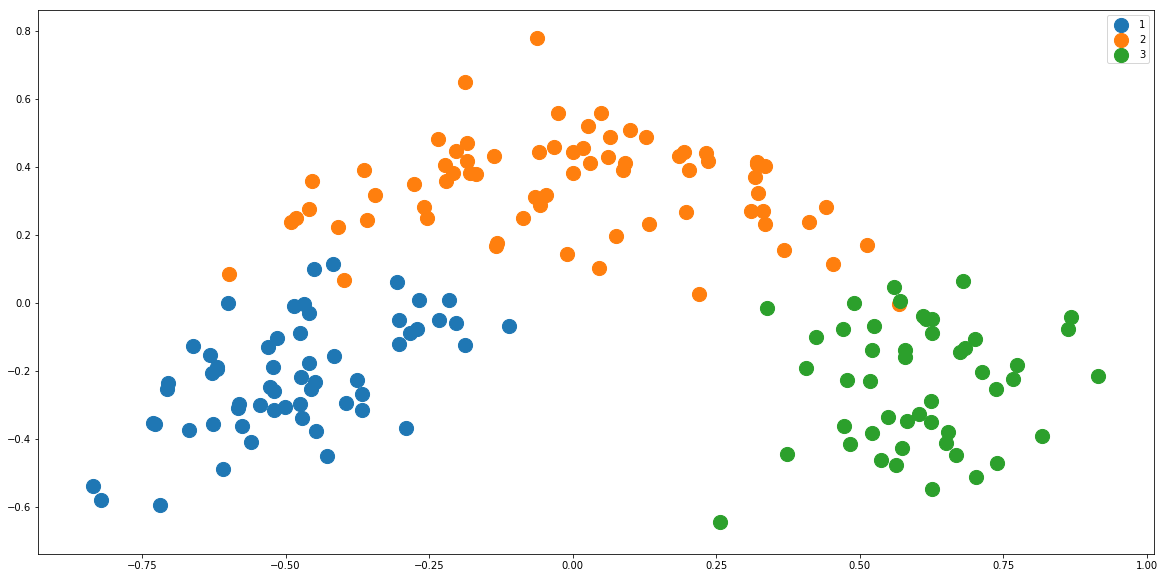

In [9]:
plot_classes(x_feature_reduced[:, 0], x_feature_reduced[:, 1], df["Class"])

**LDA**

In [10]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

lda = LDA(n_components=2)
x_feature_reduced = lda.fit(x, y).transform(x)  # LDA is Supervised and need labels

print(x.shape)
print(x_feature_reduced.shape)
print(y.shape)

(178, 13)
(178, 2)
(178, 1)


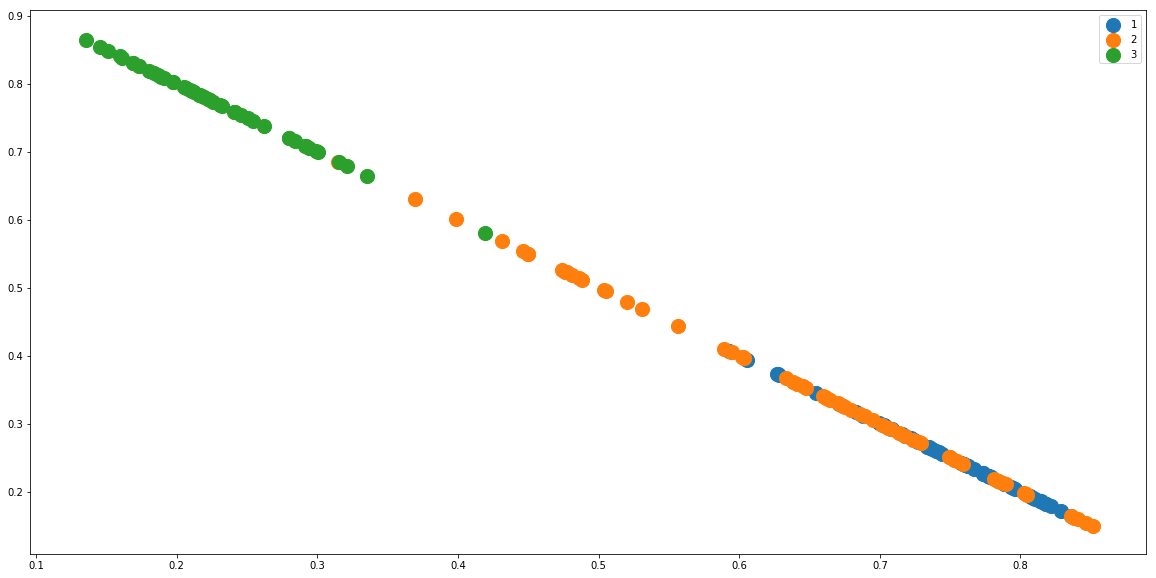

In [11]:
plot_classes(x_feature_reduced[:, 0], x_feature_reduced[:, 1], df["Class"])